In [1]:
import numpy as np
# 訓練データと検証データの分割
from sklearn.model_selection import train_test_split
# 予測結果の精度確認（ROC曲線の描画）
from sklearn.metrics import roc_auc_score, roc_curve
# データを扱う
import pandas as pd
# グラフ描画
from matplotlib import pyplot as plt

In [109]:
# モデル
from keras.models import Sequential
from keras.layers import Dense, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D

## 訓練データの読み込み

In [153]:
# CSVファイル読み込み（訓練データ）
df_train = pd.read_csv('train.csv')
df_train.head()

,Age,Gender,T_Bil,D_Bil,ALP,ALT_GPT,AST_GOT,TP,Alb,AG_ratio,disease
0,59,Male,0.786886,0.150498,220.178691,13.467617,21.729246,6.815731,3.112276,1.006802,0
1,69,Male,1.003987,0.195625,221.218413,51.033462,64.752323,6.889608,3.051521,0.751346,1
2,65,Male,0.657140,0.081287,320.770533,12.625011,30.613180,5.947767,2.489167,0.774952,0
3,65,Male,0.906822,0.214173,369.278160,34.347597,54.510085,6.967183,3.613837,0.988155,1
4,22,Female,1.734959,0.197706,222.782025,20.572891,170.010177,5.837537,3.068697,1.026654,0


In [154]:
# 性別を変換する（訓練データ）
gemder=pd.get_dummies(df_train.loc[:,['Gender']])
# df_train['Age0']=gemder.loc[:,['Gender_Female']]
# df_train['Age1']=gemder.loc[:,['Gender_Male']]
# df_train = df_train.astype({'Age0': 'int32', 'Age1': 'int32'})
df_train.drop(columns=['Gender'],inplace=True)
df_train.drop(columns=['Age'],inplace=True)
df_train.head()

,T_Bil,D_Bil,ALP,ALT_GPT,AST_GOT,TP,Alb,AG_ratio,disease
0,0.786886,0.150498,220.178691,13.467617,21.729246,6.815731,3.112276,1.006802,0
1,1.003987,0.195625,221.218413,51.033462,64.752323,6.889608,3.051521,0.751346,1
2,0.657140,0.081287,320.770533,12.625011,30.613180,5.947767,2.489167,0.774952,0
3,0.906822,0.214173,369.278160,34.347597,54.510085,6.967183,3.613837,0.988155,1
4,1.734959,0.197706,222.782025,20.572891,170.010177,5.837537,3.068697,1.026654,0


## 評価データの読み込み

In [155]:
# CSVファイル読み込み（評価データ）
df_vat = pd.read_csv('test.csv')
df_vat.head()

,Age,Gender,T_Bil,D_Bil,ALP,ALT_GPT,AST_GOT,TP,Alb,AG_ratio
0,25,Male,0.801797,0.186800,214.448679,15.260516,19.496649,6.817903,3.600752,1.288006
1,26,Female,0.834857,0.116426,234.136816,10.509159,16.733312,6.795433,3.111043,1.030562
2,64,Male,0.791830,0.197940,216.039909,14.578304,20.695866,7.524030,3.627621,1.278579
3,65,Male,0.834003,0.175741,200.901130,12.820356,20.102517,6.829109,3.626758,1.275070
4,34,Female,0.690296,0.135503,208.705835,20.279018,25.096685,8.663530,4.170750,1.280078


In [156]:
# 性別を変換する（評価データ）
#gemder=pd.get_dummies(df_vat.loc[:,['Gender']])
#df_vat['Age0']=gemder.loc[:,['Gender_Female']]
#df_vat['Age1']=gemder.loc[:,['Gender_Male']]
#df_vat = df_vat.astype({'Age0': 'int32', 'Age1': 'int32'})
df_vat.drop(columns=['Gender'],inplace=True)
df_vat.drop(columns=['Age'],inplace=True)
df_vat.head()

,T_Bil,D_Bil,ALP,ALT_GPT,AST_GOT,TP,Alb,AG_ratio
0,0.801797,0.186800,214.448679,15.260516,19.496649,6.817903,3.600752,1.288006
1,0.834857,0.116426,234.136816,10.509159,16.733312,6.795433,3.111043,1.030562
2,0.791830,0.197940,216.039909,14.578304,20.695866,7.524030,3.627621,1.278579
3,0.834003,0.175741,200.901130,12.820356,20.102517,6.829109,3.626758,1.275070
4,0.690296,0.135503,208.705835,20.279018,25.096685,8.663530,4.170750,1.280078


## データを加工する

In [157]:
def xConv(x_tmp):
    
    ## 性別のダミーデータを作成
    #nZero = np.zeros((x_tmp.shape[0], 10), dtype=np.int32)
    #df=pd.DataFrame(zero ,columns=['Age2'])
    #x_tmp = pd.concat([x_tmp, df], axis=1)
    #df=pd.DataFrame(zero ,columns=['Age3'])
    #x_tmp = pd.concat([x_tmp, df], axis=1)
    #df=pd.DataFrame(zero ,columns=['Age4'])
    #x_tmp = pd.concat([x_tmp, df], axis=1)
    #df=pd.DataFrame(zero ,columns=['Age5'])
    #x_tmp = pd.concat([x_tmp, df], axis=1)
    #df=pd.DataFrame(zero ,columns=['Age6'])
    #x_tmp = pd.concat([x_tmp, df], axis=1)
    #df=pd.DataFrame(zero ,columns=['Age7'])
    #x_tmp = pd.concat([x_tmp, df], axis=1)
    #df=pd.DataFrame(zero ,columns=['Age8'])
    #x_tmp = pd.concat([x_tmp, df], axis=1)
    #df=pd.DataFrame(zero ,columns=['Age9'])
    #x_tmp = pd.concat([x_tmp, df], axis=1)
    
    # T_Bilの変換   7
    bins = [0, 0.8, 0.85, 0.9, 0.95, 1.0, 1.5, 100]
    x_tmp=comCutCnnect(x_tmp, bins, 'T_Bil')

    # D_Bilの変換   7
    bins = [0, 0.1, 0.15, 0.2, 0.25, 0.5, 0.75, 100]
    x_tmp=comCutCnnect(x_tmp,  bins, 'D_Bil' )
    
    # ALT_GPTの変換  7
    bins = [0,  13, 15, 17, 19, 20.5, 25, 1500]
    x_tmp=comCutCnnect(x_tmp,  bins, 'ALT_GPT' )
    
    # AST_GOTの変換  7
    bins = [0, 20, 25, 30, 40, 50, 60, 1000]
    x_tmp=comCutCnnect(x_tmp, bins, 'AST_GOT' )

    # TPの変換  7
    bins = [0, 5.5, 6, 6.5, 7, 7.5, 8, 1000]
    x_tmp=comCutCnnect(x_tmp,  bins, 'TP' )
    
    # AG_ratioの変換  7
    bins = [0, 1, 1.1, 1.25, 1.28, 1.32, 1.4, 1000]
    x_tmp=comCutCnnect(x_tmp,  bins, 'AG_ratio' )
    
    # ALPの変換  7
    bins = [0, 210, 220, 225, 240, 350, 540, 2500]
    x_tmp=comCutCnnect(x_tmp,  bins, 'ALP' )
    
    # Albの変換  7
    bins = [0, 2.5, 2.8, 3.1, 3.5, 3.8, 4.5, 1000]
    x_tmp=comCutCnnect(x_tmp,  bins, 'Alb' )

    # Ageの変換の変換  7
    # bins = [0, 30, 40, 50, 60, 65, 70, 1000]
    # x_tmp=comCutCnnect(x_tmp,  bins, 'Age' )
    
    print(x_tmp.info())
    
    nRet = np.array(x_tmp)
    nRet = nRet.reshape(x_tmp.shape[0] ,8, 10, 1)
    
    return nRet


def comCutCnnect(x_tmp, bins ,col ):   
    #X_cut = pd.cut(x_tmp[col], bins=bins, labels=False)
    #cutTemp = np.zeros((len(X_cut), len(bins) -1 ), dtype=np.int32)
    #df=pd.DataFrame(cutTemp ,columns=[col + str(x) for x in range(cutTemp.shape[1])])
    
    X_cut = pd.qcut(x_tmp[col], 10 ,labels=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])
    X_cut =pd.get_dummies(X_cut, dtype= 'int32')
    #oneTmp = np.ones((len(X_cut), 10 ), dtype=np.int32)
    #x=oneTmp * X_cut
    #for idx in X_cut
        
    #df=pd.DataFrame(X_cut ,columns=[col + str(x) for x in range(X_cut.shape[1])] )
    
    
    # 列の削除
    x_tmp.drop(columns=[col], inplace=True, axis=1)
    # 列の追加
    x_tmp = pd.concat([x_tmp, X_cut], axis=1)
    return x_tmp

In [158]:
# 説明変数（訓練データ）
#x_train=xConv(df_train.loc[:,['Age', 'T_Bil', 'D_Bil', 'ALP', 'ALT_GPT', 'AST_GOT', 'TP', 'Alb','AG_ratio', 'Age0', 'Age1']])
x_train=xConv(df_train.loc[:,[ 'T_Bil', 'D_Bil', 'ALP', 'ALT_GPT', 'AST_GOT', 'TP', 'Alb','AG_ratio']])

# 目的変数（訓練データ）
y_train = np.array(df_train.loc[:,['disease']])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 80 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       850 non-null    int32
 1   1       850 non-null    int32
 2   2       850 non-null    int32
 3   3       850 non-null    int32
 4   4       850 non-null    int32
 5   5       850 non-null    int32
 6   6       850 non-null    int32
 7   7       850 non-null    int32
 8   8       850 non-null    int32
 9   9       850 non-null    int32
 10  0       850 non-null    int32
 11  1       850 non-null    int32
 12  2       850 non-null    int32
 13  3       850 non-null    int32
 14  4       850 non-null    int32
 15  5       850 non-null    int32
 16  6       850 non-null    int32
 17  7       850 non-null    int32
 18  8       850 non-null    int32
 19  9       850 non-null    int32
 20  0       850 non-null    int32
 21  1       850 non-null    int32
 22  2       850 non-null    int32
 23  3       850 non

In [159]:
# x_tmp.to_csv('./chk.csv', encoding='utf_8_sig' , header=True)

In [160]:
y = np.zeros((len(y_train), 1 + y_train.max()), dtype=np.int32)
y[np.arange(len(y_train)), y_train.T] = 1
y_train = y
X_train,X_test,Y_train,Y_test=train_test_split(x_train, y_train, test_size=0.25, random_state=1) 

In [161]:
# 行数、列数の確認
in_size1=X_train.shape[1]
in_size2=X_train.shape[2]
in_size3=X_train.shape[3]
print(X_train.shape)

(637, 8, 10, 1)


In [162]:
out_size=Y_train.shape[1]
Y_train.shape

(637, 2)

In [163]:
type(X_train[0][2])

numpy.ndarray

In [164]:
# 説明変数（評価データ）
x_tmp=xConv(df_vat)
x_vat = np.array(x_tmp)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 80 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       350 non-null    int32
 1   1       350 non-null    int32
 2   2       350 non-null    int32
 3   3       350 non-null    int32
 4   4       350 non-null    int32
 5   5       350 non-null    int32
 6   6       350 non-null    int32
 7   7       350 non-null    int32
 8   8       350 non-null    int32
 9   9       350 non-null    int32
 10  0       350 non-null    int32
 11  1       350 non-null    int32
 12  2       350 non-null    int32
 13  3       350 non-null    int32
 14  4       350 non-null    int32
 15  5       350 non-null    int32
 16  6       350 non-null    int32
 17  7       350 non-null    int32
 18  8       350 non-null    int32
 19  9       350 non-null    int32
 20  0       350 non-null    int32
 21  1       350 non-null    int32
 22  2       350 non-null    int32
 23  3       350 non

In [165]:
print(x_vat.shape)

(350, 8, 10, 1)


# モデルの定義

In [166]:
node1=20
node2=8

# 以下、ネットワークを構築
model = Sequential()


# 1. 畳み込み層(フィルタサイズ=6, カーネルサイズ=(3,3), 入力サイズ=(96,96,3))  
#input = Input(shape = (10,10))
#hidden = Reshape((10,10, 1), input_shape = (10,10))(input) 
model.add(Conv2D(filters=6, kernel_size=(2, 2), activation='sigmoid',  input_shape=(in_size1, in_size2, in_size3)))
# 2. プーリング層(プーリングサイズ=(2,2))  
model.add(MaxPooling2D(pool_size=(2, 2)))
# 3. 畳み込み層(フィルタサイズ=12, カーネルサイズ=(3,3))  
#model.add(Conv2D(filters=12, kernel_size=(3, 3)))
#model.add(Activation("sigmoid"))
# 4. プーリング層(プーリングサイズ=(2,2))  
#model.add(MaxPooling2D(pool_size=(2, 2)))
# 5. 平坦化()  
model.add(Flatten())
# 6. 全結合層(出力=120)  
model.add(Dense(units=60))
model.add(Activation("sigmoid"))
# 7. 全結合層(出力=30)  
model.add(Dense(units=30))
model.add(Activation("sigmoid"))
# 12. 全結合層(出力=2)  
model.add(Dense(units=2))
model.add(Activation("softmax"))

In [167]:
# モデルの確認
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 7, 9, 6)           30        
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 3, 4, 6)           0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 72)                0         
_________________________________________________________________
dense_15 (Dense)             (None, 60)                4380      
_________________________________________________________________
activation_19 (Activation)   (None, 60)                0         
_________________________________________________________________
dense_16 (Dense)             (None, 30)                1830      
_________________________________________________________________
activation_20 (Activation)   (None, 30)               

In [168]:
# パラメータの設定 
#  mean_squared_error   平均二乗誤差
#  categorical_crossentropy   クロスエントロピー
#model.compile(loss="categorical_crossentropy",
#             optimizer='adam',
#             metrics=["accuracy"])

model.compile(loss="mean_squared_error",
             optimizer='adam',
             metrics=["accuracy"])

#model.compile(loss="mean_squared_error",
#             optimizer='sgd',
#             metrics=["accuracy"])

In [169]:
result = model.fit(x=X_train, y=Y_train, epochs=50, batch_size=10)

Epoch 1/50
64/64 [==============================] - 0s 2ms/step - loss: 0.2498 - accuracy: 0.5228
Epoch 2/50
64/64 [==============================] - 0s 2ms/step - loss: 0.2471 - accuracy: 0.5636
Epoch 3/50
64/64 [==============================] - 0s 2ms/step - loss: 0.2469 - accuracy: 0.5589
Epoch 4/50
64/64 [==============================] - 0s 2ms/step - loss: 0.2493 - accuracy: 0.5353
Epoch 5/50
64/64 [==============================] - 0s 2ms/step - loss: 0.2438 - accuracy: 0.5589
Epoch 6/50
64/64 [==============================] - 0s 2ms/step - loss: 0.2423 - accuracy: 0.5636
Epoch 7/50
64/64 [==============================] - 0s 2ms/step - loss: 0.2403 - accuracy: 0.5620
Epoch 8/50
64/64 [==============================] - 0s 2ms/step - loss: 0.2358 - accuracy: 0.5793
Epoch 9/50
64/64 [==============================] - 0s 2ms/step - loss: 0.2262 - accuracy: 0.6374
Epoch 10/50
64/64 [==============================] - 0s 2ms/step - loss: 0.2161 - accuracy: 0.6797
Epoch 11/50
64/64 [

## 学習曲線（損失）の確認

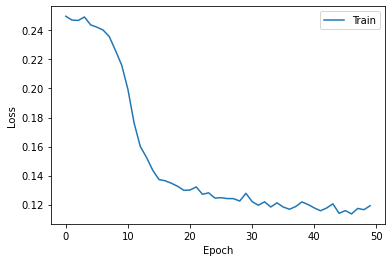

In [170]:
# 折れ線グラフによる学習データの損失の描画
plt.plot(result.history['loss'])

# 凡例の指定
plt.legend(['Train', 'Val'])

# グラフの軸タイトルの指定
plt.xlabel('Epoch')
plt.ylabel('Loss')

# 描画の実行
plt.show()


## 検証データを使って予測値の検証

In [171]:
# 検証 <-訓練データ 
score = model.evaluate(X_train, Y_train, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.11595872789621353
Test accuracy: 0.8587127327919006


In [172]:
# 検証 <-訓練データ 
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.09981606155633926
Test accuracy: 0.8732394576072693


In [173]:
def y_conv(y):
    tmp = []
    for idx in y:
        if idx[0]  <  idx[1]:
            tmp.append(1)
        else:
            tmp.append(0)
    return tmp


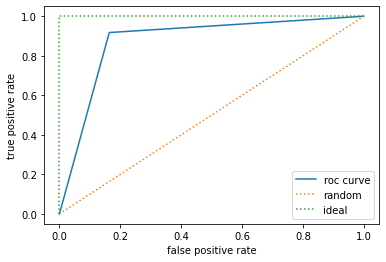

In [174]:
y_pred = model.predict(X_test)  
y_pred = y_conv(y_pred)
y_true = y_conv(Y_test)
fpr, tpr, thresholds = roc_curve(y_true=y_true, y_score=y_pred)
plt.plot(fpr, tpr, label='roc curve')
plt.plot([0, 1], [0, 1], linestyle=':', label='random')
plt.plot([0, 0, 1], [0, 1, 1], linestyle=':', label='ideal')
plt.legend()
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.show()

In [175]:
# AUCスコアの算出
auc_score = roc_auc_score(y_true=y_true, y_score=y_pred)
print("AUC:", auc_score)

AUC: 0.8768663348738002


#  予測する

In [176]:
y_predict = model.predict(x_vat)  
y_predict = y_conv(y_predict)
df_out = pd.DataFrame(y_predict, columns=['val'])

df_out.to_csv('./submit.csv', encoding='utf_8_sig' , header=False)


# モデルの保存

In [177]:
model_path = 'param.hdf5'
model.save_weights(model_path)